In [65]:
# Python 3.8.10
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from matplotlib import colors
import math
import colorsys

In [66]:
#konwerter: nie trzeba implementować samemu, można wykorzystać funkcję z bilbioteki
def hsv2rgb(h, s, v):
    return colorsys.hsv_to_rgb(h, s, v)

# poniżej znajdują się funkcje modelujące kolejne gradienty z zadania.
# v to pozycja na osi ox: v jest od 0 do 1. Zewnetrzna funkcja wywołuje te metody podając
# różne v i oczekując trójki RGB bądź HSV reprezentującej kolor. Np. (0,0,0) w RGB to kolor czarny. 
# Należy uwikłać v w funkcję modelującą kolor. W tym celu dla kolejnych gradientów trzeba przyjąć 
# sobie jakieś punkty charakterystyczne,
# np. widzimy, że po lewej stronie (dla v = 0) powinien być kolor zielony a w środku niebieski (dla v = 0.5),
# a wszystkie punkty pomiędzy należy interpolować liniowo (proporcjonalnie). 

# Return mixed color for certain v
# Example - assume that len(colors) = 5 and v = 0.28
def getColor(colors, v):
    outputColor = []
    
    point = 1.0 / (len(colors) - 1) # point = 0.25
    number = math.floor(v / point) # number = 1
    if(number >= len(colors) - 1): number -= 1 # correction for v = 1.0 (array index exceeded in for loop)
    v_p = point * number # v_p = 0.25
    v_k = v_p + point # v_k = 0.5
    
    # linear interpolation
    for a,b in zip(colors[number],colors[number+1]):
        outputColor.append(((b-a)/(v_k-v_p))*v+((a*v_k - b*v_p)/(v_k-v_p)))
    
    return tuple(outputColor)

def gradient_rgb_bw(v):
    return getColor( ( (0,0,0) , (1,1,1) ), v )


def gradient_rgb_gbr(v):
    return getColor( ( (0,1,0) , (0,0,1) , (1,0,0) ), v )


def gradient_rgb_gbr_full(v):
    return getColor( ( (0,1,0) , (0,1,1) , (0,0,1) , (1,0,1) , (1,0,0) ), v )


def gradient_rgb_wb_custom(v):
    return getColor( ( (1,1,1) , (1,0,1) , (0,0,1) , (0,1,1) , (0,1,0) , (1,1,0) , (1,0,0) , (0,0,0) ), v )


def gradient_hsv_bw(v):
    hsv = getColor(( (1,0,0), (0,0,1)) , v)
    return hsv2rgb(*hsv)


def gradient_hsv_gbr(v):
    hsv = getColor(( (1/3,1,1) , (2/3,1,1) , (1,1,1)) , v)
    return hsv2rgb(*hsv)

def gradient_hsv_unknown(v):
    hsv = getColor(( (1/3,0.502,1) , (0,0.502,1) ) , v)
    return hsv2rgb(*hsv)


def gradient_hsv_custom(v):
    hsv = getColor(( (0,1,1) , (1/3,1,1) , (2/3,0.5,1) , (1,0,1) ) , v)
    return hsv2rgb(*hsv)

In [67]:
def plot_color_gradients(gradients, names):
    # For pretty latex fonts (commented out, because it does not work on some machines)
    rc('text', usetex=True) 
    rc('font', family='serif', serif=['Times'], size=10)
    rc('legend', fontsize=10)

    column_width_pt = 400         # Show in latex using \the\linewidth
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')

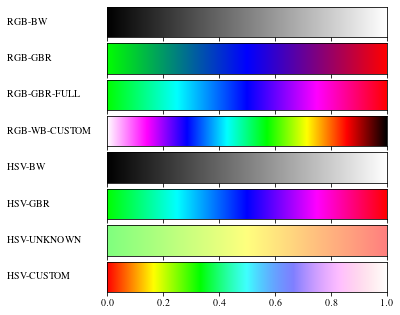

In [68]:
def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()
    
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

plot_color_gradients(gradients, [toname(g) for g in gradients])